In [1]:
import sys
sys.path.insert(0, "../")
import time

from pysbf import *

from IPython.display import display, Markdown, clear_output
warnings.filterwarnings('ignore')

In [2]:
## This is the folder that holds recent observations by wfc3 on HST in a SNAP program

inFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/'
configFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/config/'

name = "u03396"

### Checking out the log file

In [3]:
inFolder = inFolder + '/'
configFolder   = configFolder + '/'

outFolder = "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"


if exists(logFile):
    with open(logFile, 'r') as f:
        line = f.readline()

    if line.strip("#").strip()[:4] == "uuid":
        old_uuid = line.strip("#").split(":")[1].strip()                   
        if os.path.isdir(outFolder+name+"_"+old_uuid):
            uuid = old_uuid
            params = get_obj_params(open_log_df(logFile))

else:
    print("There is no log-file. \nPlease run elliprof to generate the log file and the relevant plots.")
    print("Elliprof notebook name: \"Run_elliprof_function.ipynb\"")

In [4]:
df_log = open_log_df(logFile)
sky_med = float(df_log.loc["initial_sky_med"].value)

df = open_log_df(logFile)
obj_uuid = df.loc['uuid'].value
objRoot = outFolder+name+'_'+obj_uuid+'/'

X0 = float(df.loc['X0'].value)
Y0 = float(df.loc['Y0'].value)

Config = {} 

Config["name"] = name
Config["inFolder"] = inFolder
Config["objRoot"] = objRoot
Config["configFolder"] = configFolder
Config["X0"] = X0
Config["Y0"] = Y0

In [5]:
## renuc factors for Sextractor
## 100 Mpc renuc = 1.5
## 20 Mpc renuc = 7


In [6]:
r_aperture = 20  # [pix] radius of the avoding zone

# used Dmask instead of mask1
catalName, catal_df, sex_objname, sex_mask, sex_masked, residual = SExtract(model=0, mask=1, 
                                       smooth=1.0, minArea=10, thresh=2.5,
                                       r_aperture = r_aperture,   # [pixel] ignore objects within the aperture
                                       renuc=2, **Config) 

catal_df.head()

Outputs_u03396/u03396_bb6d9894f133/obj.000.pro


,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,A_IMAGE,B_IMAGE,THETA_IMAGE,...,MAGERR_APER_1,MAGERR_APER_2,MAGERR_APER_3,MAGERR_APER_4,MAGERR_APER_5,MAG_ISO,MAGERR_ISO,MAG_ISOCOR,MAGERR_ISOCOR,rc
0,1,563.400,31.096,92.572960,79.915732,-12.4523,0.0089,1.764,1.696,-81.2,...,0.0052,0.0,-115351.75,0.0,0.0,-12.4043,0.0081,-12.4686,0.0113,532.138016
1,2,489.298,13.608,92.584841,79.917688,-11.1492,0.0465,1.538,0.993,80.4,...,0.0800,0.0,-115351.75,0.0,0.0,-10.1465,0.0453,-11.1084,0.0680,554.581194
2,3,386.999,5.468,92.598715,79.920694,-11.0744,0.0261,2.219,1.057,-77.8,...,0.0192,0.0,-115351.75,0.0,0.0,-10.9487,0.0200,-11.0607,0.0283,584.956128
3,4,169.953,5.831,92.625381,79.927408,-9.9106,0.0873,1.109,1.005,22.4,...,0.0631,0.0,-115351.75,0.0,0.0,-9.1824,0.0598,-9.6171,0.1105,682.198500
4,5,10.993,5.034,92.645101,79.932303,-10.7812,0.0195,0.914,0.877,24.5,...,0.0157,0.0,-115351.75,0.0,0.0,-10.8067,0.0157,-10.8593,0.0212,785.235580


## Ds9

Open ds9 and wait for its window to fully appear

In [7]:
os.system("ds9 "+residual+" &")

0

### Regions Guid

- green: extended opbject
- red: star, point source
- cyan: ignored
- yellow: avoding zone

In [17]:
r_aperture = 20   # [pix] radius of the avoding zone

catalName, catal_df, sex_objname, sex_mask, sex_masked, residual = SExtract(
                                       model=0, mask=1, 
                                       smooth=1.0, minArea=5, thresh=2.0,
                                       r_aperture = r_aperture,   # [pixel] ignore objects within the aperture
                                       renuc=2, **Config) 

make_se_lkn(catal_df, model=0, star_f=0.8, r_aperture=r_aperture, **Config)

os.system("xpaset -p ds9 regions delete all")
os.system("xpaset -p ds9 regions ./ds9.reg &")

Outputs_u03396/u03396_bb6d9894f133/obj.000.pro
wrote:  Outputs_u03396/u03396_bb6d9894f133/se_lknj.000
# of GCs:  113
# of galaxies:  777


0

## Ds9 

In [8]:
# http://ds9.si.edu/doc/ref/xpa.html
os.system("xpaset -p ds9 regions delete all")
os.system("xpaset -p ds9 regions ./ds9.reg &")


# set image scale
os.system("xpaset -p ds9 scale linear &")
os.system("xpaset -p ds9 scale limits -4100 200000 &")

0

## Deleting / Loading Regions

In [39]:
try:
    if rm:
        os.system("xpaset -p ds9 regions delete all")
        rm=False
    else:
        os.system("xpaset -p ds9 regions ./ds9.reg &")
        rm=True
except:
    rm = False


In [ ]:
## create the maks of the extended objects + Dmask --> dophot

## Visualizations

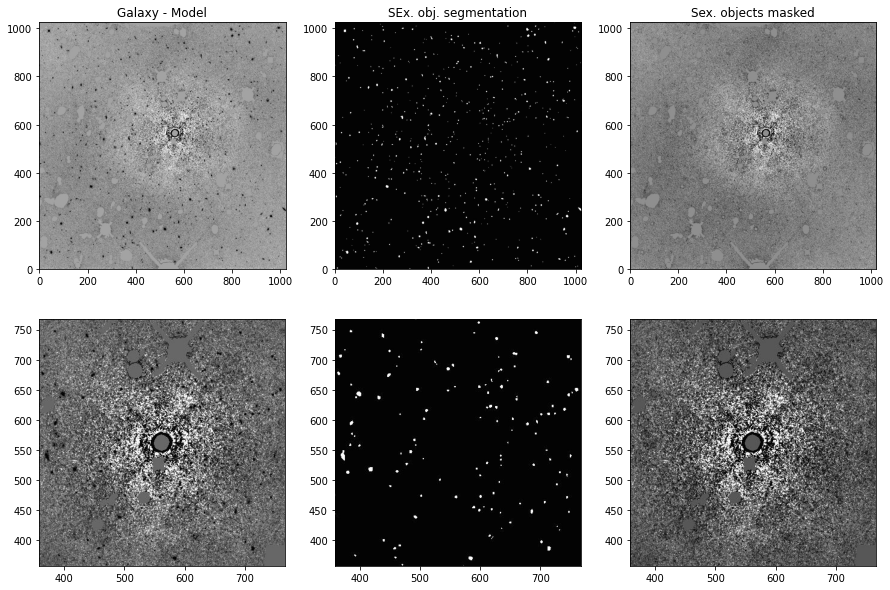

In [10]:
fig, AX = plt.subplots(2,3, figsize=(15,10))


ax1 = tv(residual, ax=AX[0][0])
ax2 = tv(sex_objname, ax=AX[0][1])
ax3 = tv(sex_masked, ax=AX[0][2], options='')

ax1.set_title("Galaxy - Model")
ax2.set_title("SEx. obj. segmentation")
ax3.set_title("Sex. objects masked")

zoom = 5
ax1 = tv(residual, ax=AX[1][0], XY=[X0,Y0], zoom=zoom, options='sqrt')
ax2 = tv(sex_objname, ax=AX[1][1], XY=[X0,Y0], zoom=zoom)
ax3 = tv(sex_masked, ax=AX[1][2], XY=[X0,Y0], zoom=zoom, options='sqrt')

In [11]:
residual

'Outputs_u03396/u03396_bb6d9894f133//resid.000'